In [14]:
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pprint
from deap import base, creator, tools, algorithms
import pandas as pd
from modules.knapsack_tools import ITEMS_KNAPSACK, MAX_CAPACITY, apply_tournament, KnapsackProblem, run_knapsack_tournament



In [15]:
df_full_knapsack = pd.read_csv('reports/knapsack_full_experiments.csv')
df_full_knapsack.head()

,Unnamed: 0,max_found_at_generation,end_mean_fitness_population,end_max_fitness,initial_population,max_generation,crossover_probability,mutation_probability,selection_method,selection_strategy_name,k_value
0,0,48,961.9,970.0,50,50,0.1,0.1,<function selTournament at 0x00000213A144F520>,Tournament,1
1,1,13,965.9,970.0,50,50,0.1,0.1,<function selTournament at 0x00000213A144F520>,Tournament,2
2,2,4,858.9,860.0,50,50,0.1,0.1,<function selTournament at 0x00000213A144F520>,Tournament,3
3,3,42,935.5,950.0,50,50,0.1,0.1,<function selTournament at 0x00000213A144F520>,Tournament,4
4,4,41,985.2,1000.0,50,50,0.1,0.2,<function selTournament at 0x00000213A144F520>,Tournament,1


In [16]:
# Finding if any, the difference between computing using Torunament or Roulette
df_full_knapsack.columns

Index(['Unnamed: 0', 'max_found_at_generation', 'end_mean_fitness_population',
       'end_max_fitness', 'initial_population', 'max_generation',
       'crossover_probability', 'mutation_probability', 'selection_method',
       'selection_strategy_name', 'k_value'],
      dtype='object')

In [17]:
df_full_knapsack.describe()

,Unnamed: 0,max_found_at_generation,end_mean_fitness_population,end_max_fitness,initial_population,max_generation,crossover_probability,mutation_probability,k_value
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,863.500000,25.643519,1002.413180,1019.622685,300.000000,100.000000,0.250000,0.250000,2.500000
std,498.974949,28.491106,22.614099,22.648084,204.183235,40.836647,0.111836,0.111836,1.118358
min,0.000000,1.000000,858.900000,860.000000,50.000000,50.000000,0.100000,0.100000,1.000000
25%,431.750000,9.000000,998.042500,1030.000000,50.000000,50.000000,0.175000,0.175000,1.750000
50%,863.500000,13.000000,1008.349091,1030.000000,300.000000,100.000000,0.250000,0.250000,2.500000
75%,1295.250000,31.000000,1016.942273,1030.000000,550.000000,150.000000,0.325000,0.325000,3.250000
max,1727.000000,149.000000,1030.000000,1030.000000,550.000000,150.000000,0.400000,0.400000,4.000000


In [18]:
df_full_knapsack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1728 non-null   int64  
 1   max_found_at_generation      1728 non-null   int64  
 2   end_mean_fitness_population  1728 non-null   float64
 3   end_max_fitness              1728 non-null   float64
 4   initial_population           1728 non-null   int64  
 5   max_generation               1728 non-null   int64  
 6   crossover_probability        1728 non-null   float64
 7   mutation_probability         1728 non-null   float64
 8   selection_method             1728 non-null   object 
 9   selection_strategy_name      1728 non-null   object 
 10  k_value                      1728 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 148.6+ KB


In [19]:
df_full_knapsack['end_max_fitness']

0        970.0
1        970.0
2        860.0
3        950.0
4       1000.0
         ...  
1723    1030.0
1724    1030.0
1725    1030.0
1726    1030.0
1727    1030.0
Name: end_max_fitness, Length: 1728, dtype: float64

In [20]:
df_full_knapsack['max_found_at_generation']

0       48
1       13
2        4
3       42
4       41
        ..
1723     8
1724    10
1725     8
1726     6
1727     5
Name: max_found_at_generation, Length: 1728, dtype: int64

In [29]:
# replace Unnamed: 0 with index

df_full_knapsack = df_full_knapsack.drop(columns=['Unnamed: 0'])

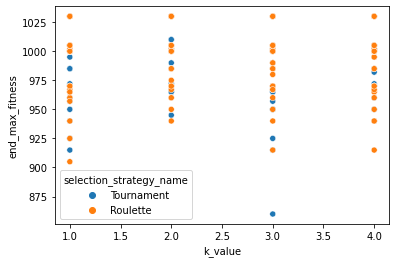

In [35]:
# difference if selection_strategy_name not `Best`
selected_df = df_full_knapsack[df_full_knapsack['selection_strategy_name'] != 'Best']
sns.scatterplot(data=selected_df, x='k_value', y='end_max_fitness', hue='selection_strategy_name')

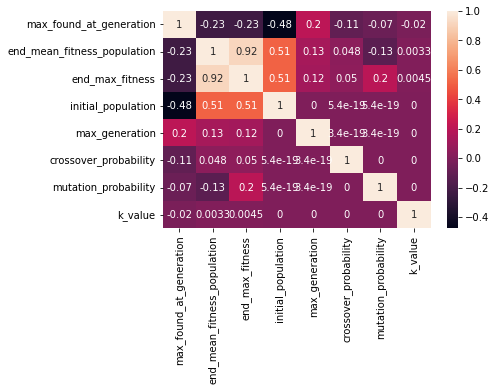

In [36]:
sns.heatmap(selected_df.corr(), annot=True)

In [ ]:

sns.scatterplot(data=selected_df, x='max_found_at_generation', y='end_max_fitness', hue='selection_strategy_name')

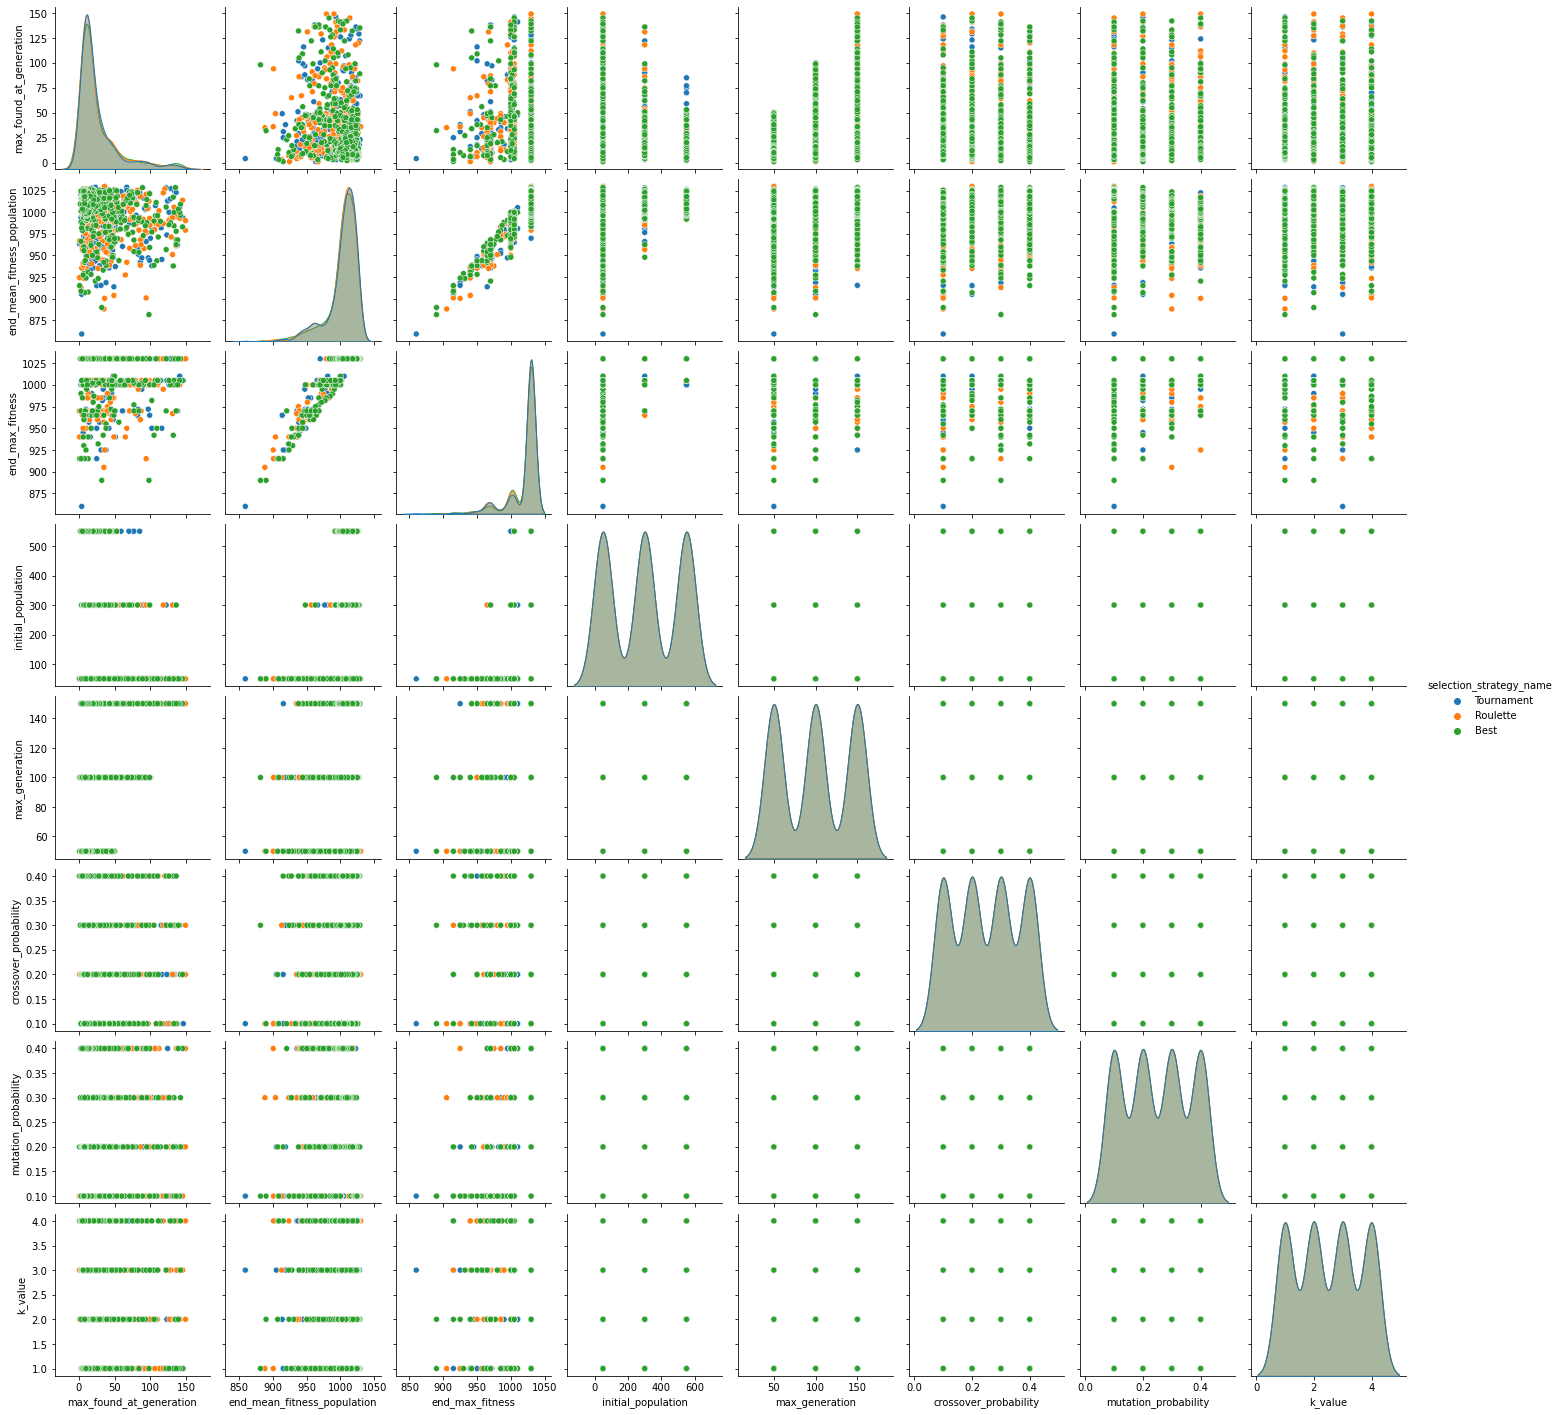

In [31]:
# corr plots.
sns.pairplot(df_full_knapsack, hue='selection_strategy_name')

In [32]:
# Correlation matrix
df_full_knapsack.corr()

,max_found_at_generation,end_mean_fitness_population,end_max_fitness,initial_population,max_generation,crossover_probability,mutation_probability,k_value
max_found_at_generation,1.000000,-0.244860,-0.251991,-4.840414e-01,2.331123e-01,-9.477023e-02,-7.040075e-02,-0.024115
end_mean_fitness_population,-0.244860,1.000000,0.916360,5.170708e-01,1.335170e-01,4.079093e-02,-1.259814e-01,0.007798
end_max_fitness,-0.251991,0.916360,1.000000,5.190785e-01,1.174516e-01,3.906947e-02,2.102756e-01,0.009053
initial_population,-0.484041,0.517071,0.519078,1.000000e+00,0.000000e+00,3.603521e-19,3.603521e-19,0.000000
max_generation,0.233112,0.133517,0.117452,0.000000e+00,1.000000e+00,2.252201e-19,2.252201e-19,0.000000
crossover_probability,-0.094770,0.040791,0.039069,3.603521e-19,2.252201e-19,1.000000e+00,0.000000e+00,0.000000
mutation_probability,-0.070401,-0.125981,0.210276,3.603521e-19,2.252201e-19,0.000000e+00,1.000000e+00,0.000000
k_value,-0.024115,0.007798,0.009053,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000


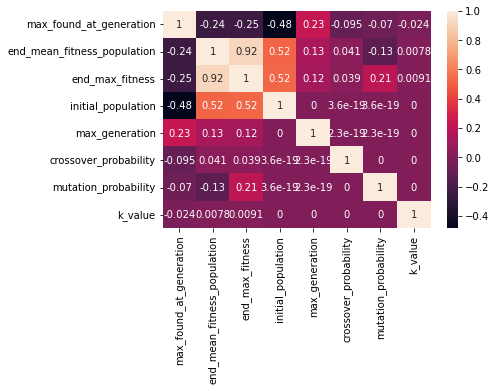

In [33]:
sns.heatmap(df_full_knapsack.corr(), annot=True)

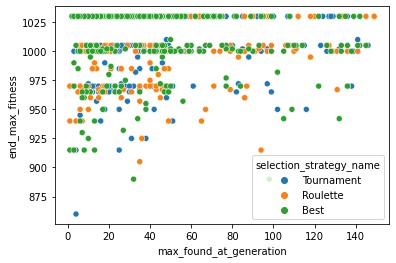

In [37]:
# Correcting column name references and using 'hue' for color coding

sns.scatterplot(data=df_full_knapsack, 
                x='max_found_at_generation', 
                y='end_max_fitness',
                hue='selection_strategy_name'
                )



In [40]:
# T Test
from scipy.stats import ttest_ind

# T Test for Tournament and Roulette

# Output variables: 	max_found_at_generation	end_mean_fitness_population	end_max_fitness	initial_population	max_generation	

output_variables = ['max_found_at_generation', 'end_mean_fitness_population', 'end_max_fitness','end_max_fitness']
ttest_ind(df_full_knapsack[df_full_knapsack['selection_strategy_name'] == 'Tournament'][output_variables],
            df_full_knapsack[df_full_knapsack['selection_strategy_name'] == 'Roulette'][output_variables])


Ttest_indResult(statistic=array([-0.24105878,  0.49789979,  0.26877548,  0.26877548]), pvalue=array([0.80955253, 0.61864987, 0.78815067, 0.78815067]))

In [41]:
ttest_ind(df_full_knapsack[df_full_knapsack['selection_strategy_name'] == 'Tournament'][output_variables],
            df_full_knapsack[df_full_knapsack['selection_strategy_name'] == 'Best'][output_variables])

Ttest_indResult(statistic=array([-0.78275557,  0.346537  ,  0.29468014,  0.29468014]), pvalue=array([0.43393182, 0.72900258, 0.76829142, 0.76829142]))

In [42]:
ttest_ind(df_full_knapsack[df_full_knapsack['selection_strategy_name'] == 'Roulette'][output_variables],
            df_full_knapsack[df_full_knapsack['selection_strategy_name'] == 'Best'][output_variables])


Ttest_indResult(statistic=array([-0.53668376, -0.14779815,  0.03241924,  0.03241924]), pvalue=array([0.59158988, 0.88252798, 0.97414335, 0.97414335]))

In [45]:
# Sort end_max_fitness

df_full_knapsack.sort_values(by='end_max_fitness', ascending=False).head(30)

,max_found_at_generation,end_mean_fitness_population,end_max_fitness,initial_population,max_generation,crossover_probability,mutation_probability,selection_method,selection_strategy_name,k_value
864,82,1025.566667,1030.0,300,100,0.3,0.1,<function selRoulette at 0x00000213A144F5B0>,Roulette,1
1077,10,1016.463636,1030.0,550,100,0.4,0.2,<function selRoulette at 0x00000213A144F5B0>,Roulette,2
1075,12,1023.834545,1030.0,550,100,0.4,0.1,<function selRoulette at 0x00000213A144F5B0>,Roulette,4
1074,12,1022.632727,1030.0,550,100,0.4,0.1,<function selRoulette at 0x00000213A144F5B0>,Roulette,3
1073,5,1024.778182,1030.0,550,100,0.4,0.1,<function selRoulette at 0x00000213A144F5B0>,Roulette,2
1072,8,1021.369091,1030.0,550,100,0.4,0.1,<function selRoulette at 0x00000213A144F5B0>,Roulette,1
1071,9,998.180000,1030.0,550,100,0.3,0.4,<function selRoulette at 0x00000213A144F5B0>,Roulette,4
1070,10,1004.236364,1030.0,550,100,0.3,0.4,<function selRoulette at 0x00000213A144F5B0>,Roulette,3
1069,5,999.030909,1030.0,550,100,0.3,0.4,<function selRoulette at 0x00000213A144F5B0>,Roulette,2
1068,7,1007.100000,1030.0,550,100,0.3,0.4,<function selRoulette at 0x00000213A144F5B0>,Roulette,1


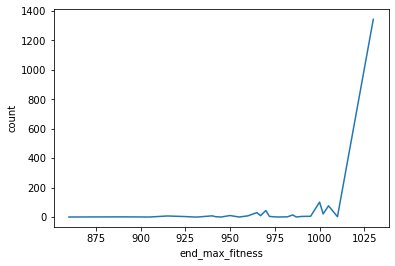

In [52]:
# Plot by count end max fitness distribution with line plot.
# Plot by count end max fitness distribution with line plot.

gbmax = df_full_knapsack['end_max_fitness'].value_counts().reset_index()
gbmax.columns = ['end_max_fitness', 'count'] 
sns.lineplot(data=gbmax, x='end_max_fitness', y='count')

In [53]:
gbmax.head()

,end_max_fitness,count
0,1030.0,1343
1,1000.0,102
2,1005.0,77
3,970.0,45
4,965.0,31


In [57]:
# For loop in terms of max_geneartion allowed to find the first time 1030 as a fitness is found and at which parameters.

generations = [x for x in range(50, 200, 50)]

for max_generation in generations:
    print(f"Max generation: {max_generation}")
    df = df_full_knapsack[df_full_knapsack['max_generation'] == max_generation]
    # print(df[df['end_max_fitness'] == 1030])
    if df[df['end_max_fitness'] == 1030].shape[0] > 0:
        print(df[df['end_max_fitness'] == 1030])
        break


Max generation: 50
      max_found_at_generation  end_mean_fitness_population  end_max_fitness  \
11                         30                  1016.400000           1030.0   
12                          8                  1011.620000           1030.0   
14                         14                  1003.940000           1030.0   
23                         11                  1018.500000           1030.0   
27                         12                   999.720000           1030.0   
...                       ...                          ...              ...   
1595                        4                  1008.190909           1030.0   
1596                        7                  1004.581818           1030.0   
1597                       10                  1001.980000           1030.0   
1598                        9                  1001.556364           1030.0   
1599                       10                   999.856364           1030.0   

      initial_population  max_ge

In [59]:
df50 = df[(df['end_max_fitness'] == 1030) & (df['max_generation'] == 50)]
df50.head()

,max_found_at_generation,end_mean_fitness_population,end_max_fitness,initial_population,max_generation,crossover_probability,mutation_probability,selection_method,selection_strategy_name,k_value
11,30,1016.40,1030.0,50,50,0.1,0.3,<function selTournament at 0x00000213A144F520>,Tournament,4
12,8,1011.62,1030.0,50,50,0.1,0.4,<function selTournament at 0x00000213A144F520>,Tournament,1
14,14,1003.94,1030.0,50,50,0.1,0.4,<function selTournament at 0x00000213A144F520>,Tournament,3
23,11,1018.50,1030.0,50,50,0.2,0.2,<function selTournament at 0x00000213A144F520>,Tournament,4
27,12,999.72,1030.0,50,50,0.2,0.3,<function selTournament at 0x00000213A144F520>,Tournament,4


In [61]:
# Group by selection_strategy_name.
gb_strategy_name = df50['selection_strategy_name'].value_counts().reset_index()
gb_strategy_name.head()

,index,selection_strategy_name
0,Roulette,140
1,Best,138
2,Tournament,136
